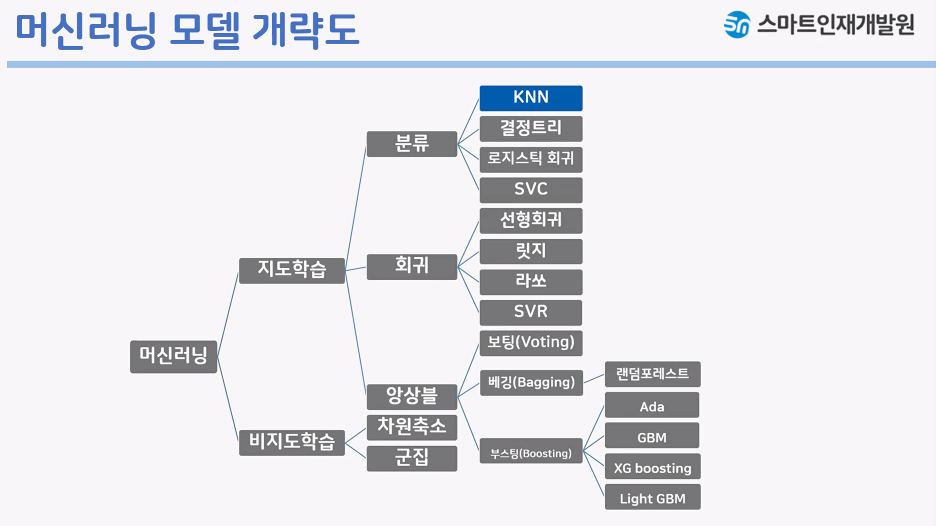

## 목표
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [1]:
# 라이브러리 가져오기
# numpy, pandas, matplotlib 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bmi_500 가져오기
# 컬럼을 인덱스로 수정하기
bmi = pd.read_csv('bmi_500.csv', index_col = 'Label')

# 최상단 5개 데이터만 출력 
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [3]:
# Label이 Normal 인 데이터만 가져오기(loc, iloc 인덱서 활용)
bmi.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [4]:
# 전체 row수, 결측치 여부, 컬럼별 정보
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 31.8+ KB


In [5]:
# 기술통계 확인
# describe() 메소드 사용
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


## 각 비만도 등급별로 시각화

In [6]:
# label 확인하기 
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [7]:
# label별 색을 넣어주는 함수 정의 
def myScatter(label, color):
    tmp = bmi.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c = color,
               label = label)
    

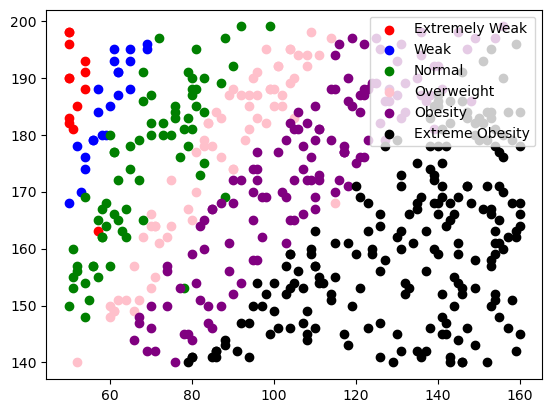

In [8]:
myScatter('Extremely Weak', 'red')
myScatter('Weak', 'blue')
myScatter('Normal', 'green')
myScatter('Overweight', 'pink')
myScatter('Obesity', 'purple')
myScatter('Extreme Obesity', 'black')

plt.legend(loc = 'upper right')

plt.show()

## 모델링
1. 문제와 답으로 분리
2. 훈련셋과 평가셋으로 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 평가 

In [9]:
data = pd.read_csv('bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [12]:
# 문제데이터, 답데이터(1차원)로 분리
# imput_data 라는 변수에는 문제 데이터로 담아주기 ('Height' : 'Weight')
# target_data 라는 변수에는 답 데이터 담아주기 ('Label')
input_data = data.loc[:,'Height':'Weight']
target_data = data.loc[:,'Label']

In [15]:
# 문제와 답 데이터의 모양/ 크기 확인하기
# shape 메소드 활용
print(input_data.shape)
print(target_data.shape)

(500, 2)
(500,)


In [33]:
input_data.loc[:349,:] # loc 는 인덱스명으로 판별하기 때문에 끝값 미포함 아님

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
345,184,106
346,191,68
347,162,58
348,178,138


In [29]:
# 훈련세트와 테스트세트로 나누기
# 훈련세트 : 테스트세트 = 7 : 3

# X_train 에는 훈련용 문제 데이터를 0~349 
X_train = input_data.iloc[:350,:]

#X_test 에는 테스트용 문제 데이터를 350~끝
X_test = input_data.iloc[350:,:]

#y_train 에는 답데이터를 0~349
y_train = target_data.iloc[:350]

#y_test 에는 답데이터를 350 ~ 500
y_test = target_data.iloc[350:]

In [34]:
# 각각의 데이터의 크기/모양 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [41]:
# 사이킷런 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # 평가를 위한 모듈

In [43]:
# 모델 생성
# 하이퍼파라미터 튜닝
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model

KNeighborsClassifier(n_neighbors=10)

In [44]:
# 훈련진행 fit 메소드
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
X_test

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [48]:
# 예측 predict 메소드
pre= knn_model.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [51]:
# 정확도 측정
metrics.accuracy_score(pre,y_test)

0.94

## 활용하기

In [54]:
knn_model.predict([[179,73],[184,3]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal', 'Extremely Weak'], dtype=object)

##### KNN 모델 (K- Nearest Neighbors) : k-최근접 이웃 알고리즘
- 새로운 데이터 포인트와 가장 가까운 훈련 데이터셋의 데이터 포인트를 찾아 예측
- k 값에 따라 가까운 이웃의 수를 결정
- 분류와 회귀 모두 가능